***Content for Website***


***Data set 1***

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.max_columns = None

data = pd.read_csv("../raw_data/ds_salaries.csv")
data.head(2)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S


***Salaries***

In [38]:
#salary in %, does not work: 

# Zuerst berechnen Sie die Wertezählungen (als Prozentsätze)
salary_counts = data['salary_in_usd'].value_counts(normalize=True) * 100

# Dann plotten Sie das Histogramm der Gehälter
plt.figure(figsize=(10,6))
sns.histplot(data['salary_in_usd'], bins=20, weights=[salary_counts[i] for i in data['salary_in_usd']])

# Setzen Sie die x-Achse auf 0
plt.xlim(left=0)

plt.xticks(rotation=45)
plt.title('Salary Distribution')
plt.xlabel('Salaries in USD')
plt.ylabel('Percentage')

plt.show()


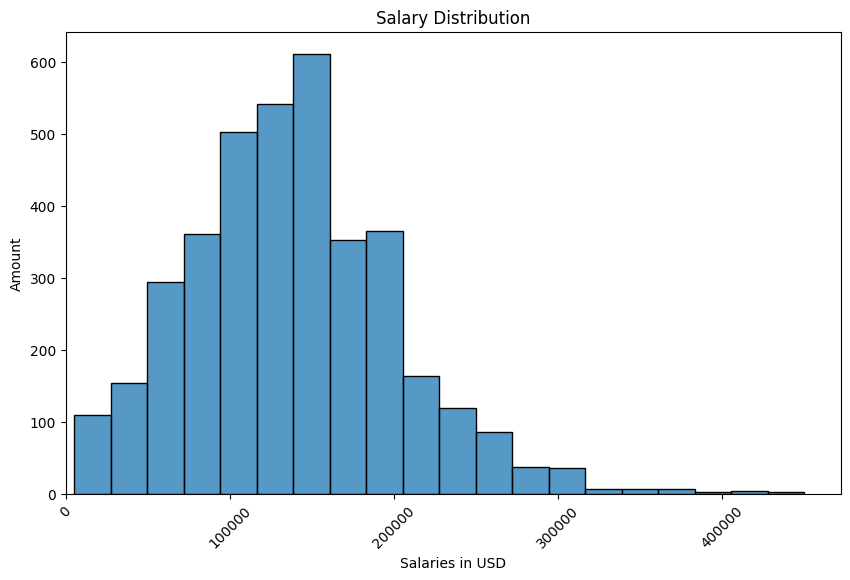

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.histplot(data["salary_in_usd"], bins=20)

# Set the x-axis to start at 0
plt.xlim(left=0)

plt.xticks(rotation=45)
plt.title('Salary Distribution')
plt.xlabel('Salaries in USD')
plt.ylabel('Amount')

plt.show()


***Charts: Countries, Job titles etc.***

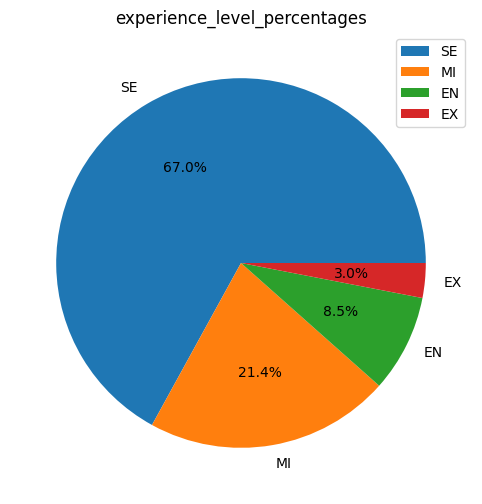

experience_level
SE    67.003995
MI    21.438083
EN     8.521971
EX     3.035952
Name: proportion, dtype: float64

In [10]:
experience_level_percentages = data["experience_level"].value_counts(normalize=True) * 100


plt.figure(figsize=(10,6))
plt.pie(experience_level_percentages, labels=experience_level_percentages.index, autopct='%1.1f%%')
plt.title("experience_level_percentages")
plt.legend()
plt.show()

experience_level_percentages

***Data set 2***

In [5]:
data2 = pd.read_csv('../raw_data/data_cleaned_2021.csv')
data2.head(2)

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Hourly,Employer provided,Lower Salary,Upper Salary,Avg Salary(K),company_txt,Job Location,Age,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.0,Tecolote Research,NM,48,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,data scientist,na,M
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,87.5,University of Maryland Medical System,MD,37,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,data scientist,na,M


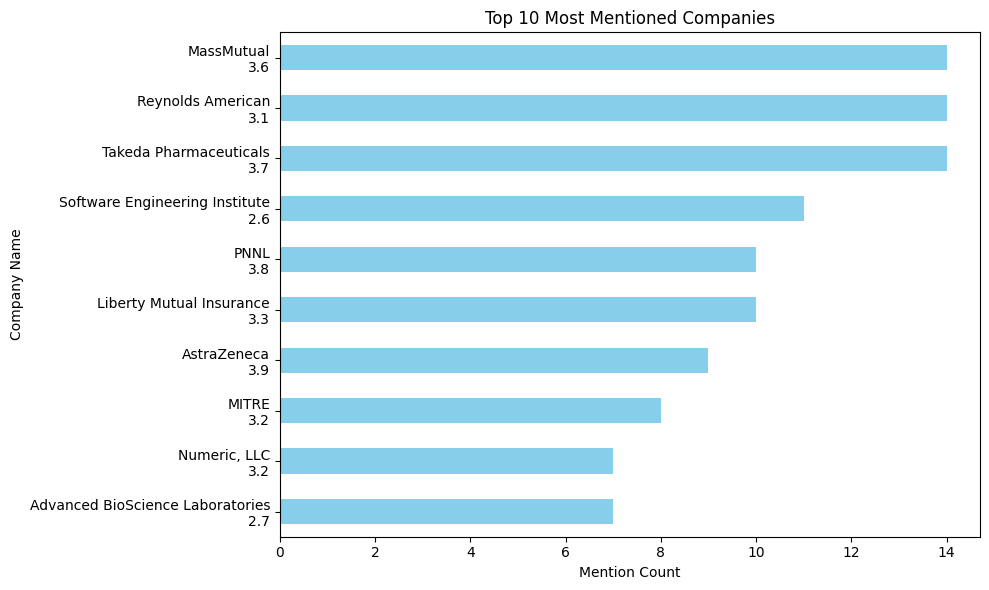

In [26]:
# 1. Top 20 Most Mentioned Companies
top_20_most_mentioned_companies = data2['Company Name'].value_counts().head(10).sort_values(ascending=False)
top_20_most_mentioned_companies = top_20_most_mentioned_companies[::-1]

# Plotting

plt.figure(figsize=(10, 6))
top_20_most_mentioned_companies.plot(kind='barh', color='skyblue')
plt.title('Top 10 Most Mentioned Companies')
plt.ylabel('Company Name')
plt.xlabel('Mention Count')
plt.tight_layout()
plt.show()

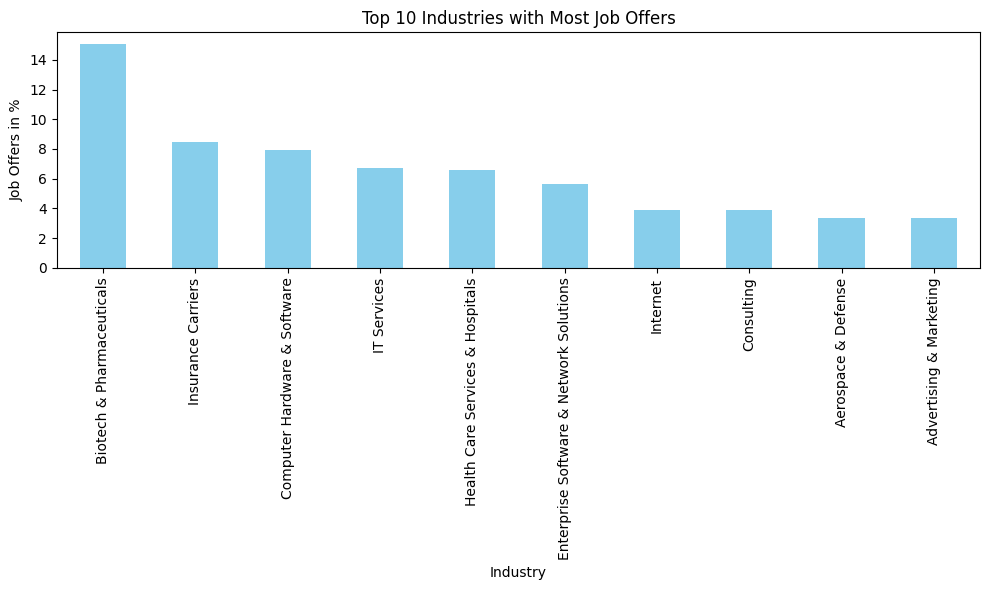

In [19]:
### 4. Top 20 Industries with Most Job Offers
industry_job_offers= data2['Industry'].value_counts(normalize=True).head(10) * 100

# Plotting
plt.figure(figsize=(10, 6))
industry_job_offers.plot(kind='bar', color='skyblue')
plt.title('Top 10 Industries with Most Job Offers')
plt.xlabel('Industry')
plt.ylabel('Job Offers in %')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

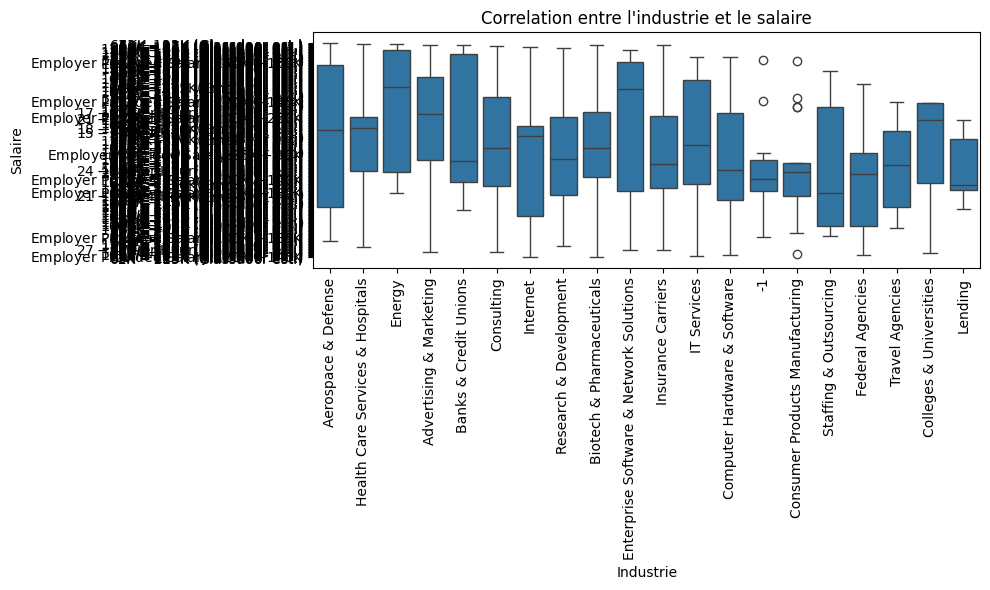

In [15]:
# 4. Correlation entre l'industrie et le salaire
plt.figure(figsize=(10, 6))
industry_job_offers = data2['Industry'].value_counts().head(20).index
industry_salaries = data2[data2['Industry'].isin(industry_job_offers)]

sns.boxplot(x='Industry', y='Salary Estimate', data=industry_salaries)
plt.title('Correlation entre l\'industrie et le salaire')
plt.xlabel('Industrie')
plt.ylabel('Salaire')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


#good chart, what happend on the left, possible to clean up? make values readable (not vertical). 

***Suggestions Raphael***

discuss: 

distribution of experience level --> describing interesting vs describing dataset (keep separate) 
Impact of remote positions on salary (hard to read)
Clusters of Data jobs (= to show no real categories exist and that they overlap) --> The insight for the reader is unclear. Therefore use in backup to describe our process).  
Salary vs skills by job title (hard to read for the user,use in Backup to describe our process)


done: 
Job categories based on remote work and employee residence
Salary distribution for entry - level (should be changed to %)
Correlation between Job titles and salary
Regression plot : Skills vs Avg Salary (hard to read)


job_category
0% Remote                            1923
Hybrid/Remote - Same Country         1743
Hybrid/Remote - Different Country      89
Name: count, dtype: int64


/tmp/ipykernel_91015/1466535506.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_percentages, palette='viridis')


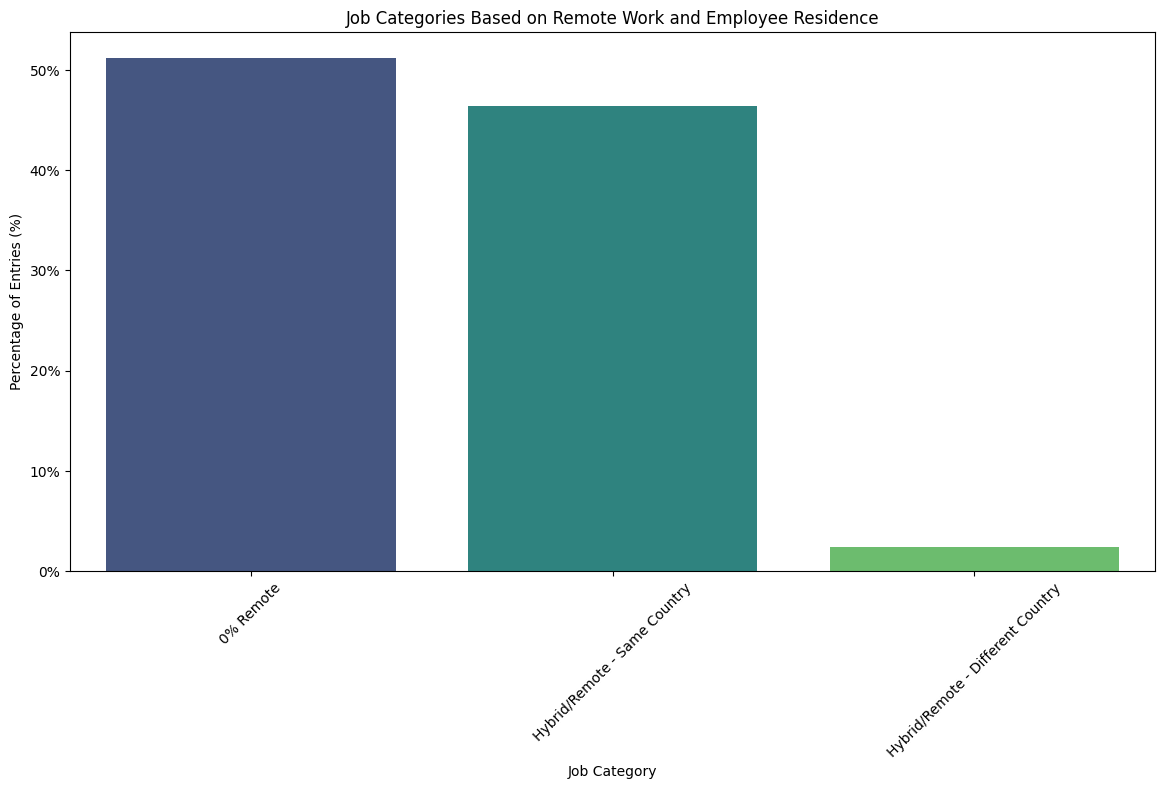

In [40]:
import matplotlib.ticker as mtick

# Define categories based on the criteria
def categorize_jobs(row):
    if row['remote_ratio'] == 0:
        return '0% Remote'
    elif row['remote_ratio'] > 0 and row['employee_residence'] == row['company_location']:
        return 'Hybrid/Remote - Same Country'
    else:
        return 'Hybrid/Remote - Different Country'

# Apply the function to create a new 'job_category' column
data['job_category'] = data.apply(categorize_jobs, axis=1)

# Count the number of entries for each category
category_counts = data['job_category'].value_counts()

# Display the counts (optional)
print(category_counts)

# Berechnen Sie die Gesamtzahl der Einträge
total_entries = sum(category_counts.values)

# Berechnen Sie den Prozentsatz für jede Kategorie
category_percentages = [value / total_entries * 100 for value in category_counts.values]

plt.figure(figsize=(14, 7))
sns.barplot(x=category_counts.index, y=category_percentages, palette='viridis')
plt.title('Job Categories Based on Remote Work and Employee Residence')
plt.xlabel('Job Category')
plt.ylabel('Percentage of Entries (%)')
plt.xticks(rotation=45)  # Drehen Sie die Beschriftungen der x-Achse für eine bessere Lesbarkeit

# Formatieren Sie die y-Achse, um Prozentsätze anzuzeigen
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())

plt.show()


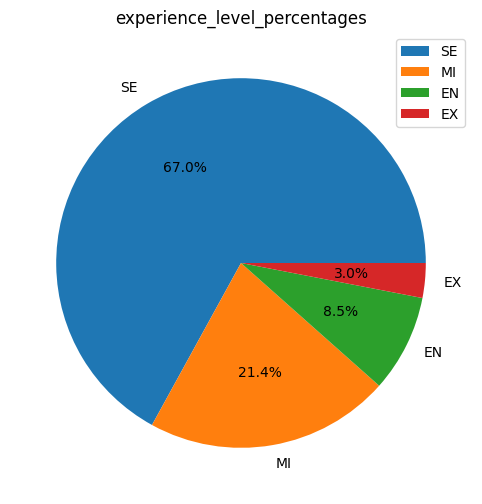

experience_level
SE    67.003995
MI    21.438083
EN     8.521971
EX     3.035952
Name: proportion, dtype: float64

In [46]:
experience_level_percentages = data["experience_level"].value_counts(normalize=True) * 100


plt.figure(figsize=(10,6))
plt.pie(experience_level_percentages, labels=experience_level_percentages.index, autopct='%1.1f%%')
plt.title("experience_level_percentages")
plt.legend()
plt.show()

experience_level_percentages

#EN > Entry-level / Junior
#MI> Mid-level / Intermediate
#SE > Senior-level / Expert
#EX > Executive-level / Director

/tmp/ipykernel_91015/671743181.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  entry_level_data['salary_range'] = pd.cut(entry_level_data['salary'], bins=bins, labels=labels, right=False)
/tmp/ipykernel_91015/671743181.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=salary_range_counts.index, y=salary_range_counts.values, palette='pastel')


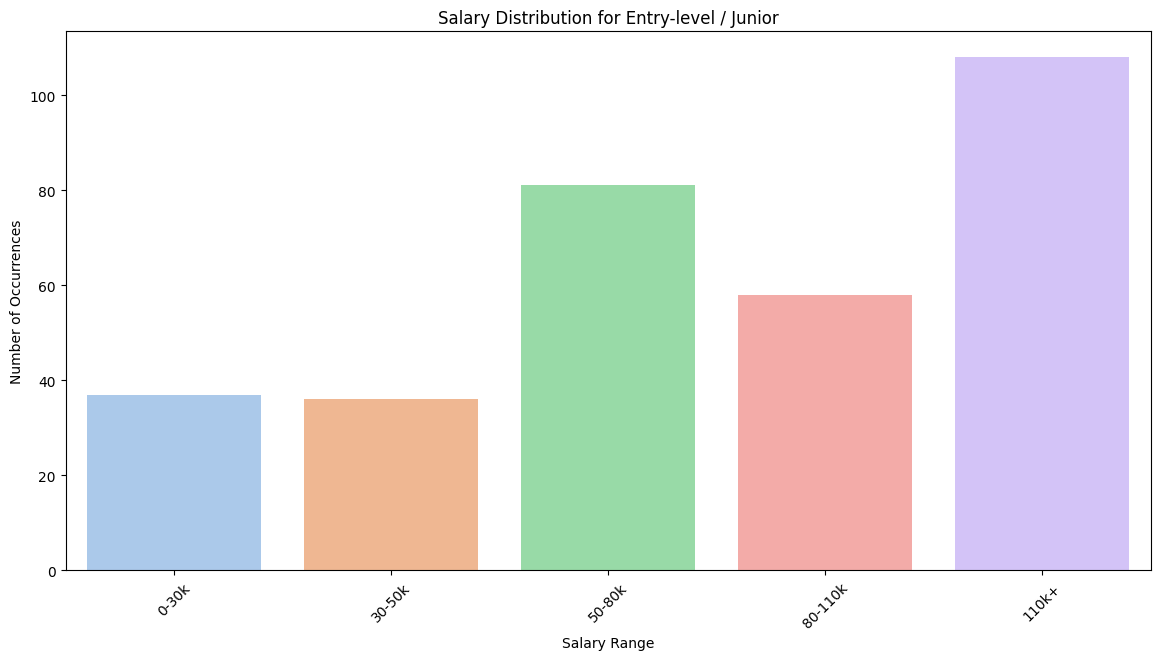

In [41]:
# Filter the dataset for Entry-level / Junior (EN)
entry_level_data = data[data['experience_level'] == 'EN']

# Define custom salary ranges (bins) and labels
bins = [0, 30000, 50000, 80000, 110000, float('inf')]
labels = ['0-30k', '30-50k', '50-80k', '80-110k', '110k+']

# Bin the salary data into the defined ranges
entry_level_data['salary_range'] = pd.cut(entry_level_data['salary'], bins=bins, labels=labels, right=False)

# Count the occurrences of each salary range
salary_range_counts = entry_level_data['salary_range'].value_counts().sort_index()

# Plotting the number of occurrences of each salary range for Entry-level / Junior using a bar plot
plt.figure(figsize=(14, 7))
sns.barplot(x=salary_range_counts.index, y=salary_range_counts.values, palette='pastel')
plt.title('Salary Distribution for Entry-level / Junior')
plt.xlabel('Salary Range')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45)
plt.show()

/tmp/ipykernel_91015/1147083194.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  se_level_data['salary_range'] = pd.cut(se_level_data['salary'], bins=bins, labels=labels, right=False)
/tmp/ipykernel_91015/1147083194.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=salary_range_counts.index, y=salary_range_counts.values, palette='pastel')


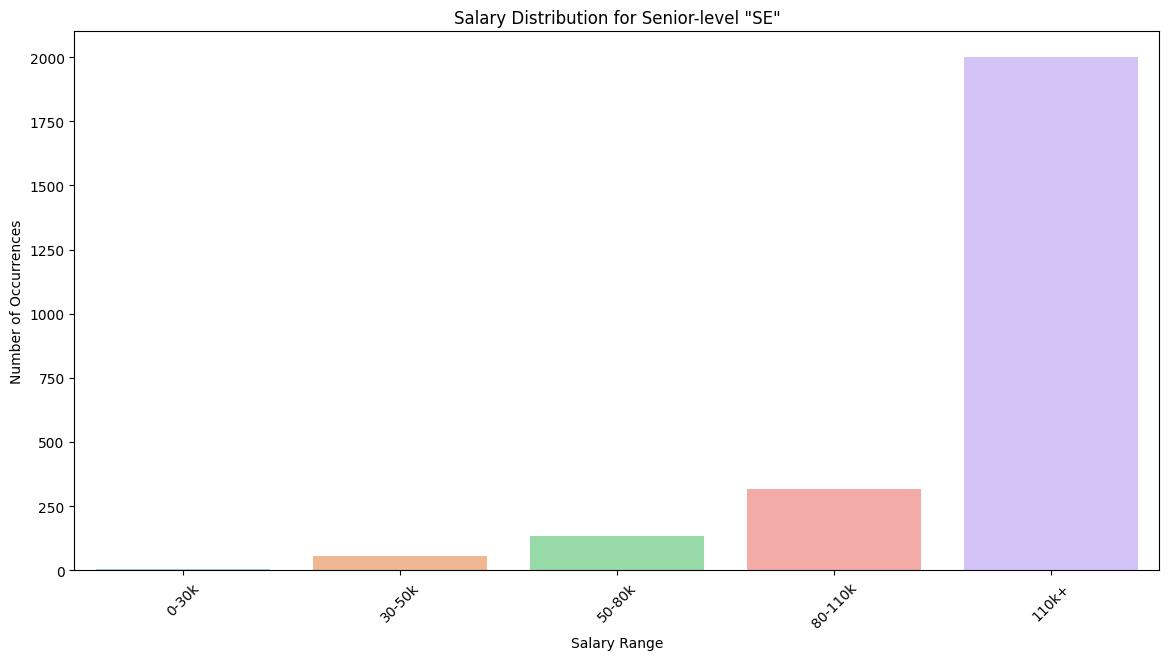

In [56]:
# Filter the dataset for Senior-level "SE"
se_level_data = data[data['experience_level'] == 'SE']

# Define custom salary ranges (bins) and labels
bins = [0, 30000, 50000, 80000, 110000, float('inf')]
labels = ['0-30k', '30-50k', '50-80k', '80-110k', '110k+']

# Bin the salary data into the defined ranges
se_level_data['salary_range'] = pd.cut(se_level_data['salary'], bins=bins, labels=labels, right=False)

# Count the occurrences of each salary range
salary_range_counts = se_level_data['salary_range'].value_counts().sort_index()

# Plotting the number of occurrences of each salary range for se-level / Junior using a bar plot
plt.figure(figsize=(14, 7))
sns.barplot(x=salary_range_counts.index, y=salary_range_counts.values, palette='pastel')
plt.title('Salary Distribution for Senior-level "SE"')
plt.xlabel('Salary Range')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45)
plt.show()

/tmp/ipykernel_91015/847364817.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mi_level_data['salary_range'] = pd.cut(mi_level_data['salary'], bins=bins, labels=labels, right=False)
/tmp/ipykernel_91015/847364817.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=salary_range_counts.index, y=salary_range_counts.values, palette='pastel')


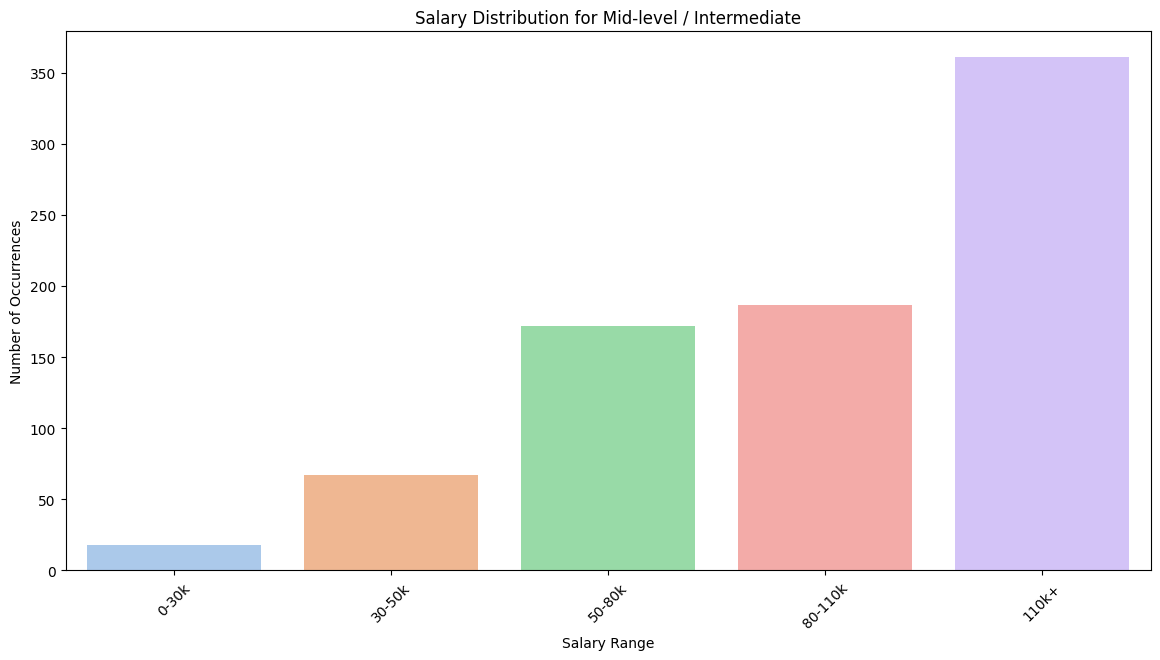

In [55]:
# Filter the dataset for Mid-level / Intermediate
mi_level_data = data[data['experience_level'] == 'MI']

# Define custom salary ranges (bins) and labels
bins = [0, 30000, 50000, 80000, 110000, float('inf')]
labels = ['0-30k', '30-50k', '50-80k', '80-110k', '110k+']

# Bin the salary data into the defined ranges
mi_level_data['salary_range'] = pd.cut(mi_level_data['salary'], bins=bins, labels=labels, right=False)

# Count the occurrences of each salary range
salary_range_counts = mi_level_data['salary_range'].value_counts().sort_index()

# Plotting the number of occurrences of each salary range for Mi-level / Junior using a bar plot
plt.figure(figsize=(14, 7))
sns.barplot(x=salary_range_counts.index, y=salary_range_counts.values, palette='pastel')
plt.title("Salary Distribution for Mid-level / Intermediate")
plt.xlabel('Salary Range')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45)
plt.show()

/tmp/ipykernel_91015/2937167442.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ex_level_data['salary_range'] = pd.cut(ex_level_data['salary'], bins=bins, labels=labels, right=False)
/tmp/ipykernel_91015/2937167442.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=salary_range_counts.index, y=salary_range_counts.values, palette='pastel')


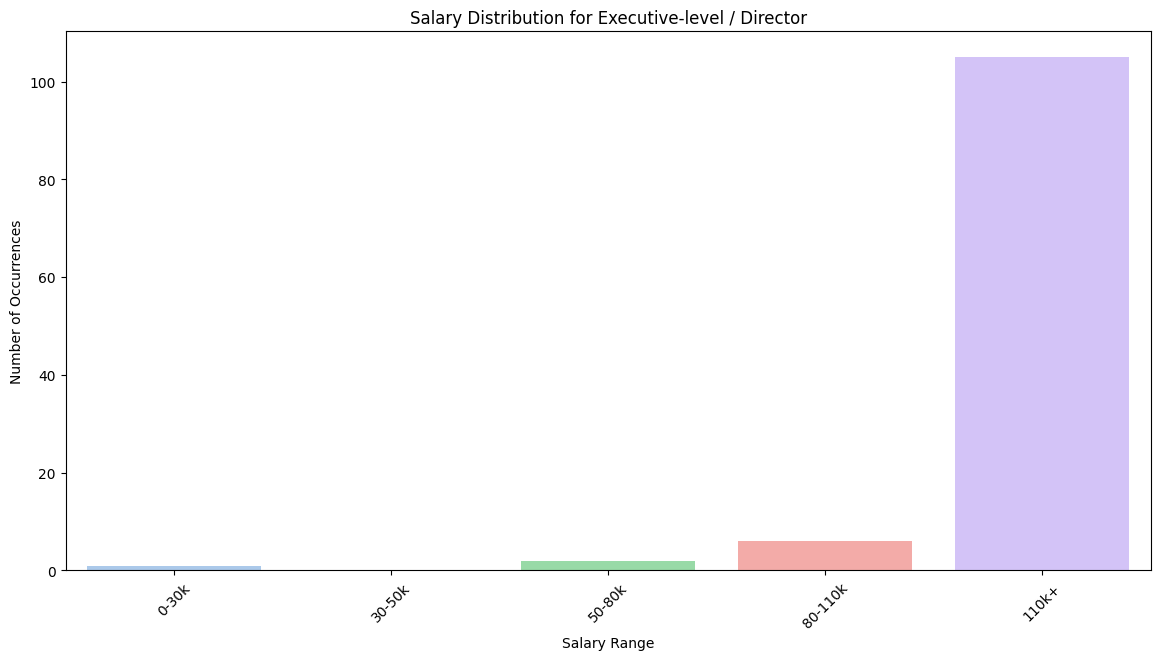

In [57]:
# Filter the dataset for #EX > Executive-level / Director
ex_level_data = data[data['experience_level'] == 'EX']

# Define custom salary ranges (bins) and labels
bins = [0, 30000, 50000, 80000, 110000, float('inf')]
labels = ['0-30k', '30-50k', '50-80k', '80-110k', '110k+']

# Bin the salary data into the defined ranges
ex_level_data['salary_range'] = pd.cut(ex_level_data['salary'], bins=bins, labels=labels, right=False)

# Count the occurrences of each salary range
salary_range_counts = ex_level_data['salary_range'].value_counts().sort_index()

# Plotting the number of occurrences of each salary range for ex-level / Junior using a bar plot
plt.figure(figsize=(14, 7))
sns.barplot(x=salary_range_counts.index, y=salary_range_counts.values, palette='pastel')
plt.title("Salary Distribution for Executive-level / Director")
plt.xlabel('Salary Range')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45)
plt.show()

***Salaries by job titles***